# Movie Recommendation System

## Introduction.


### About us








**ND2** is a medium size data science consultancy company based in Capetown. We provide data science solutions ranging from Data collection, data cleaning, analysis and model building and model deployment. We pride ourselves in quality delivery and offer services to financial I, government entities and government entities.


> ### Problem Statement
 
>A movie recommender system is a tool that suggests movies to users based on their viewing history and preferences. The goal of a movie recommender system is to provide personalized recommendations to users, by predicting the movies they are most likely to enjoy. This is typically done by analyzing large amounts of data on users and movies, such as ratings, reviews, and viewing history, and using machine learning algorithms to identify patterns and make predictions. Some popular techniques used in movie recommender systems include collaborative filtering, content-based filtering and hybrid approach which combines both the above techniques.

>In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

>Recommender systems are needed because they can help users find relevant and interesting items among a large and growing collection of options. Without a recommender system, users may have a hard time discovering new items that match their interests, and may rely on simple, less effective methods such as browsing through lists or searching with keywords.

<figure>
<center><img src ="./Movieimage.png" width = "850" height = '500'/>

### Possible Features of a Movie Recommender System:

- **User Profiling**: This feature allows the system to create a profile for each user, which includes information such as their viewing history, ratings, and preferences.
- **Content-Based Filtering:** This feature recommends movies to users based on the attributes of the movies they have previously watched or liked.
- **Collaborative Filtering:** This feature recommends movies to users based on the viewing history and preferences of similar users.
- **Hybrid Approach:** This feature combines the above two techniques to provide more accurate recommendations.
- **Real-Time Recommendations:** This feature makes recommendations in real-time, so that the user doesn't have to wait for the system to process their request.
- **Scalability:** This feature allows the system to handle large amounts of data and make accurate recommendations for a large number of users.
- **Continual Learning:** This feature allows the system to continuously learn and improve its recommendations over time.
- **Handling New Movies and Users:** This feature allows the system to handle new movies and users, and make recommendations for them as well.
- **User-Friendly Interface:** This feature provides an easy to use interface to interact with the system, and make it accessible to a wide range of users.

### Data Source
For the purpose of this project; MovieLens dataset has been used. The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB


### Table of Contents

1. Connecting to comet_ml

2. Importing Packages

3. Loading Data

4. Exploratory Data Analysis (EDA)

5. Feature Engineering

6. Model Training

7. Model Evaluation

8. Model Deployment
9. Conclusion

###   Create a connection to comet_ml

### Importing Relevant Libraries

In [4]:
# Import our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [5]:
#Import available csv files
genome_score_df = pd.read_csv('genome_scores.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
imdb_df = pd.read_csv('imdb_data.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
tags_df = pd.read_csv('tags.csv')
train_df = pd.read_csv('train.csv')

In [31]:
#Taking initial view of the dataframes
# Preview genome_score dataframe
print('The data has:',genome_score_df.shape[1], 'features and', genome_score_df.shape[0], 'rows')
genome_score_df.head()

The data has: 3 features and 15584448 rows


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [32]:
# Preview genome_tags dataframe
print('The data has:',genome_tags_df.shape[1], 'features and', genome_tags_df.shape[0], 'rows')
genome_tags_df.head()

The data has: 2 features and 1128 rows


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [33]:
# Preview imdb dataframe
print('The data has:',imdb_df.shape[1], 'features and', imdb_df.shape[0], 'rows')
imdb_df.head()

The data has: 6 features and 27278 rows


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [34]:
# Preview links dataframe
print('The data has:',links_df.shape[1], 'features and', links_df.shape[0], 'rows')
links_df.head()

The data has: 3 features and 62423 rows


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [38]:
# Preview movies dataframe
print('The data has:',movies_df.shape[1], 'features and', movies_df.shape[0], 'rows')
movies_df.head()

The data has: 3 features and 62423 rows


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
# Preview tags dataframe
print('The data has:',tags_df.shape[1], 'features and', tags_df.shape[0], 'rows')
tags_df.head()

The data has: 4 features and 1093360 rows


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [37]:
# Preview train dataframe
print('The data has:',train_df.shape[1], 'features and', train_df.shape[0], 'rows')
train_df.head()

The data has: 4 features and 10000038 rows


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


### Exploratory Data Analysis (EDA)

> In this section,  data sets will be analyzed to find patterns, tell insights, and summarize their main characteristics, often with visual methods and an in-depth analysis of all the variables in the DataFrame. This helps for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

### Genres Distribution
At this stage, our goal is to determine which genres are most prevalent among movies. By understanding the most common genres, we can gain insight into the types of movies that were most frequently produced during the time period represented in the data.

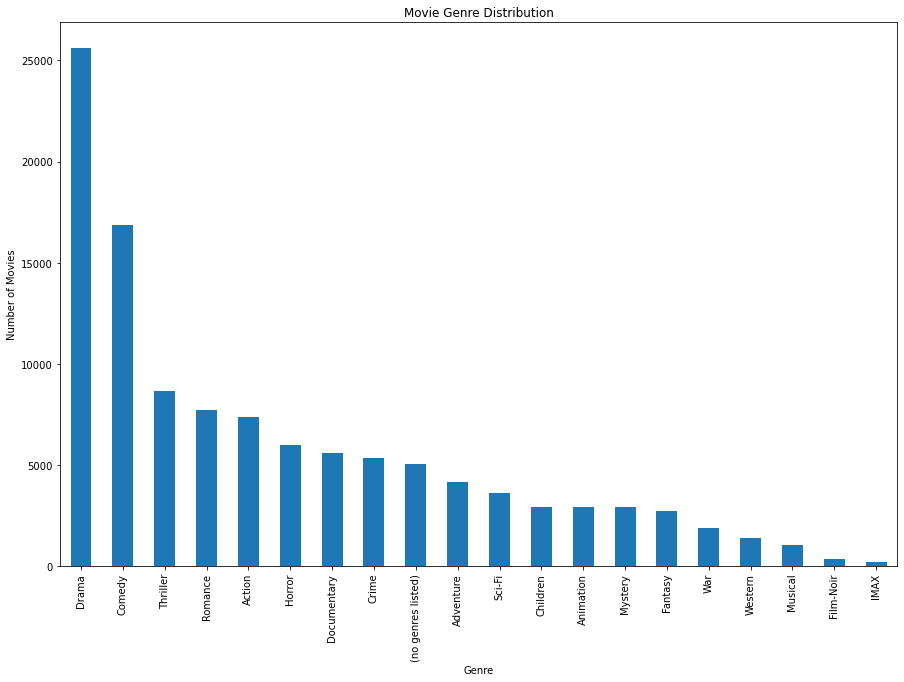

In [44]:
# Create a new dataframe with each genre as a separate row
genres_df = movies_df.genres.str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(15,10)) #Set the size of the chart, width, height in inches
# Plot the distribution using a bar chart
genres_df.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movie Genre Distribution')
plt.show()

### Observations From Genres Distribution
- The Drama genre was by far the most frequently produced genre in the period captured by the data
- The IMAX genre is the least produced genre as revealed by the data, this is not surprising, as the name IMAX is not considered by some as a genre, but rather a brand name for a specific type of large-format theater and film technology

In [27]:
# Create a movie year column
movies_df["year"] = movies_df["title"].str.replace(r'[a-zA-Z]', '', regex=True)
movies_df["year"] = movies_df["year"].str.replace(r' ', '', regex=True)
movies_df["year"] = movies_df["year"].str.replace('(', ' ', regex=True) #Remove the '(' from the year column
movies_df["year"] = movies_df["year"].str.replace(')', ' ', regex=True) ##Remove the ')' from the year column
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


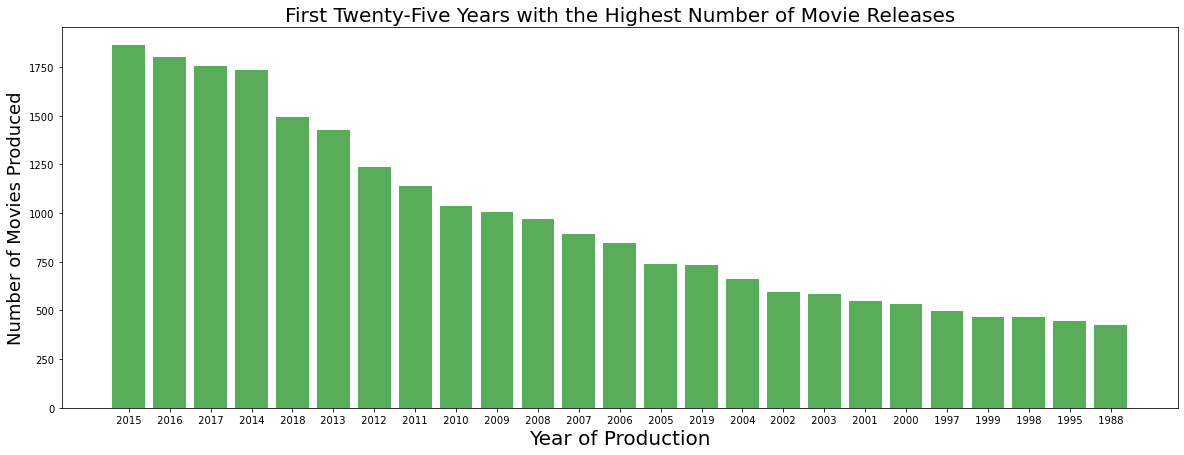

In [41]:
# Create a bar chart to visualize the first 25 years with the highest number of movie releases

# Convert the 'year' column to string data type
movies_df["year"] = movies_df["year"].astype(str)

# Count the number of movies released in each year
yearly_movie_count = movies_df["year"].value_counts()

# Create a bar chart
plt.figure(figsize=(20,7))
plt.bar(yearly_movie_count.index[:25], yearly_movie_count.values[:25],  color='g', alpha=0.65)

# Set axis labels and chart title
plt.xlabel("Year of Production", fontsize = 20)
plt.ylabel("Number of Movies Produced", fontsize = 18)
plt.title("First Twenty-Five Years with the Highest Number of Movie Releases", fontsize = 20)

# Show the chart
plt.show()

### Observations from  first 25 years with the highest number of movie releases
- The timeline of the highest movies produced showed a progressive increament as the years increase, however there were some distruptions as in this pattern of increment, such as in 2019 there was a sharp decrease when compared with the preceeding year 2018. The cause of such distruptions requires further investigations.
- The year 2015 posted the highest amount of movies released in a year. however after 2015 the number of movies released began to decline upto 2019. Could this be as a result the World economy dynamics of those years?

### Data Preprocessing

In [12]:
# Cleaning and transforming the data in the input files to a format that can be used for building the model.


### Feature Engineering

In [ ]:
# Extracting relevant features from the data that can be used to train the model

### Model Training 

In [ ]:
# Discussion on the model architecture
#Train a recommendation model using the engineered features, 

### Model evaluation

In [ ]:
# Evaluating the performance of the trained model using a suitable evaluation metric such as RMSE.

### Model deployment 

In [ ]:
# Deploying the trained model in a production environment to make recommendations to users using streamlit.

In [2]:
#End Comet experiment
#experiment.end()

### Conclusion

In [ ]:
# Summary of the key findings of the project and areas for future work.

### REFERENCE